<a href="https://colab.research.google.com/github/GustavoEmanuel901/Aulas-ML/blob/main/Enseble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [22]:
from sklearn.datasets import load_wine
wine = load_wine()

In [29]:
y = wine.target
X = wine.data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [32]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = rf_model.predict(X_test)

In [34]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred, target_names=wine.target_names))

Acurácia: 0.98
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        33
     class_1       0.94      1.00      0.97        34
     class_2       1.00      1.00      1.00        22

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



# Exemplo

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [131]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Carregar o conjunto de dados Breast Cancer
data = load_diabetes()
X = data.data
y = data.target

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [102]:
df = pd.DataFrame(X, columns=data.feature_names)
correlation_matrix = df.iloc[:, :-1].corr()


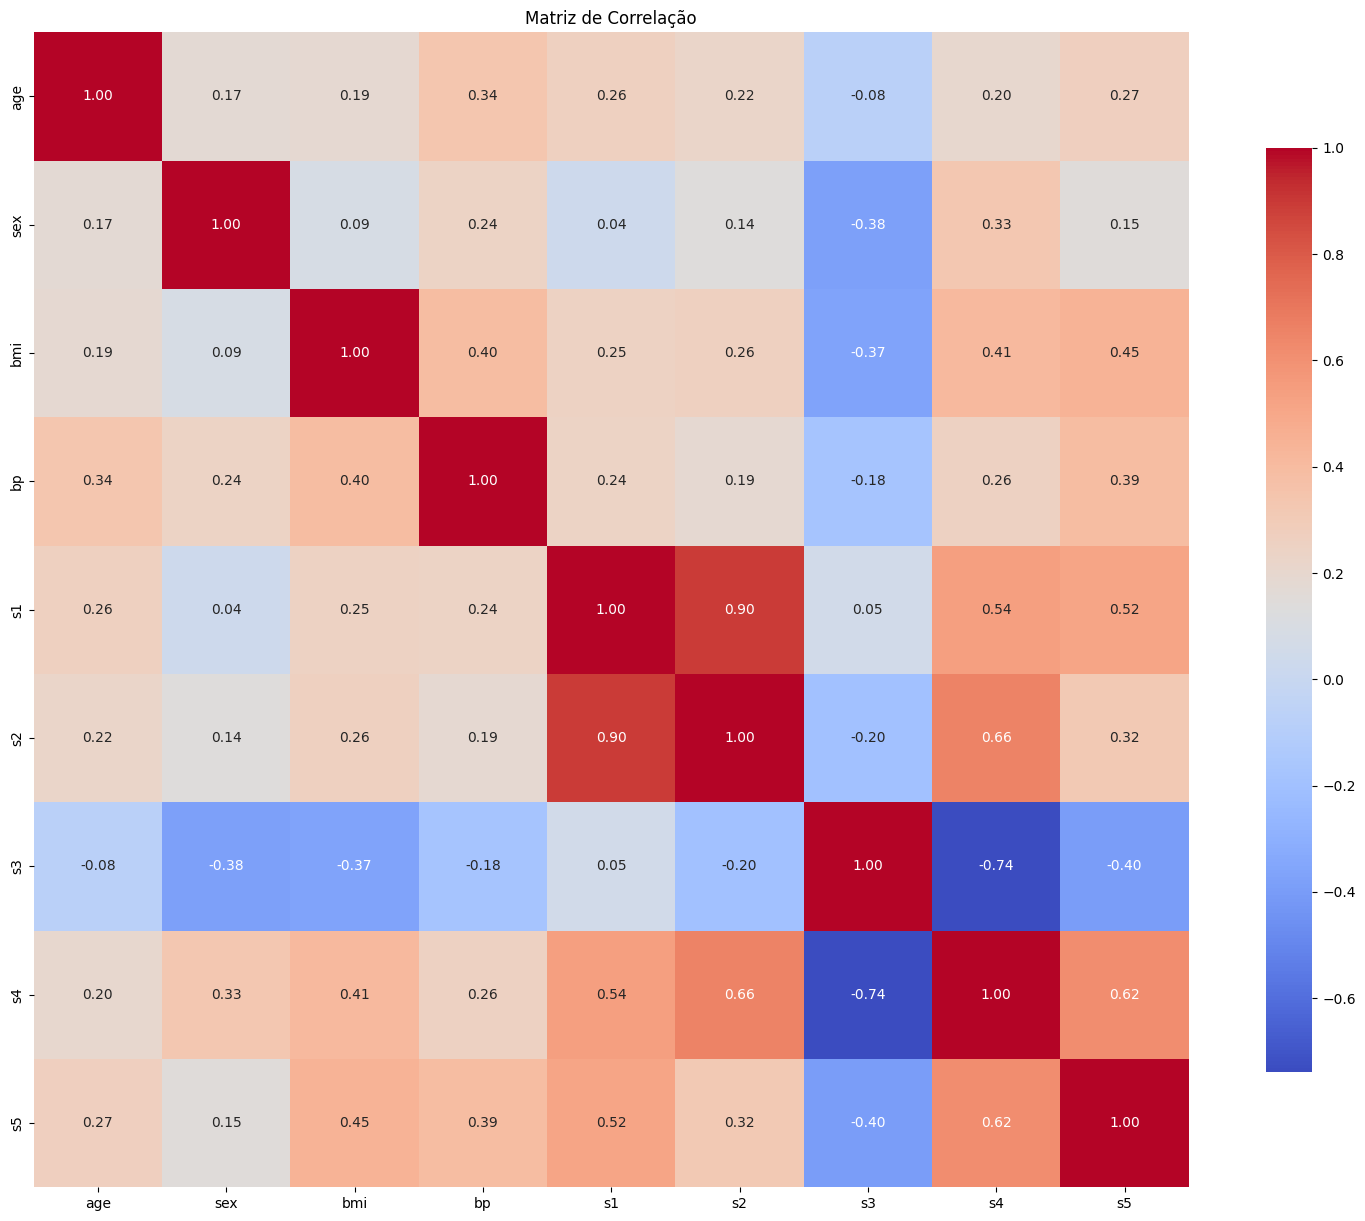

In [103]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,cbar_kws={'shrink': .8})
plt.title('Matriz de Correlação')
plt.show()

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=6)

In [105]:
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)

LinearRegression()

In [106]:
y_pred = lin_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  55.55870624821781


## Bagging

In [107]:
from sklearn.ensemble import BaggingRegressor

In [108]:
d_tree = DecisionTreeRegressor(max_depth=4)
bag_reg = BaggingRegressor(estimator = d_tree, n_estimators=100, random_state=42)

In [109]:
bag_reg.fit(x_train,y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100,
                 random_state=42)

In [110]:
y_pred = bag_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  58.98229937314538


In [111]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

Erro Quadrático Médio (MSE): 3478.91
Coeficiente de Determinação (R²): 0.40


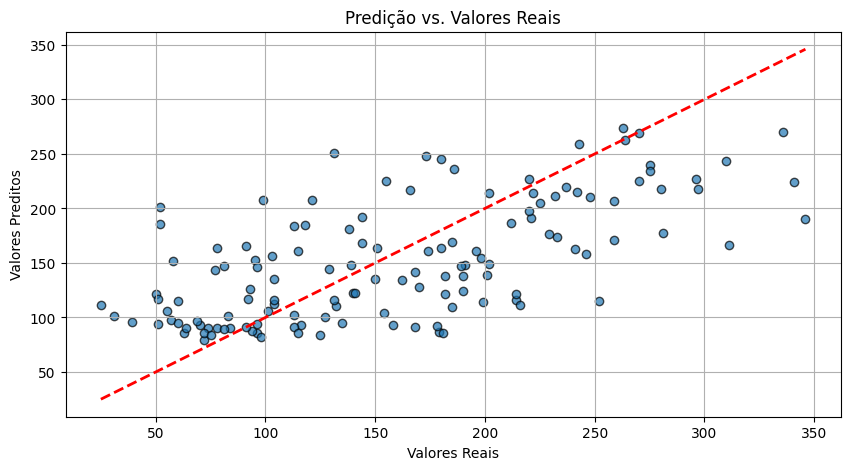

In [112]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predição vs. Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.grid(True)
plt.show()

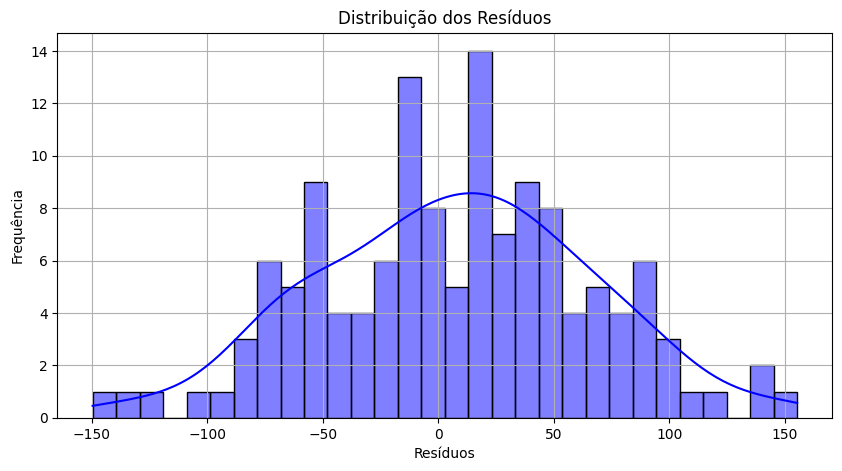

In [113]:
residuos = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, color='blue', bins=30)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

## Boosting

In [114]:
from sklearn.ensemble import AdaBoostRegressor

In [115]:
d_tree = DecisionTreeRegressor(max_depth=3)

# Instantiate AdaBoostRegressor model with a decision tree as the base model
bst_reg = AdaBoostRegressor(estimator = d_tree)

bst_reg.fit(x_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3))

In [116]:
y_pred = bst_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  59.030816728484005


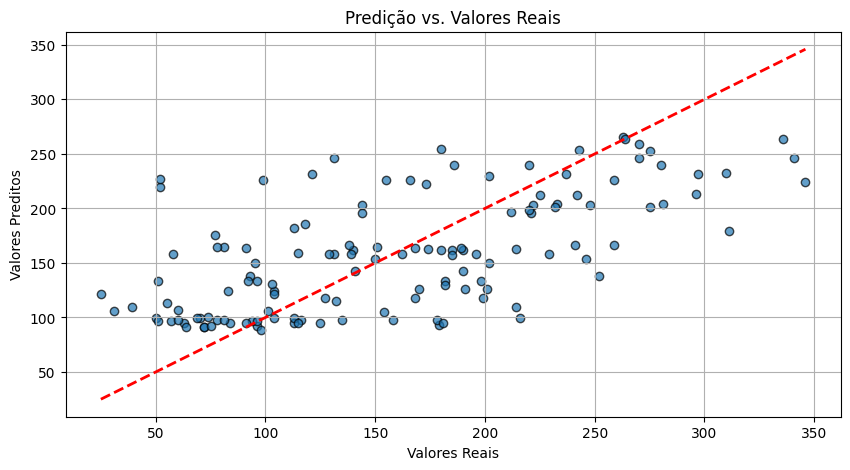

In [117]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predição vs. Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.grid(True)
plt.show()

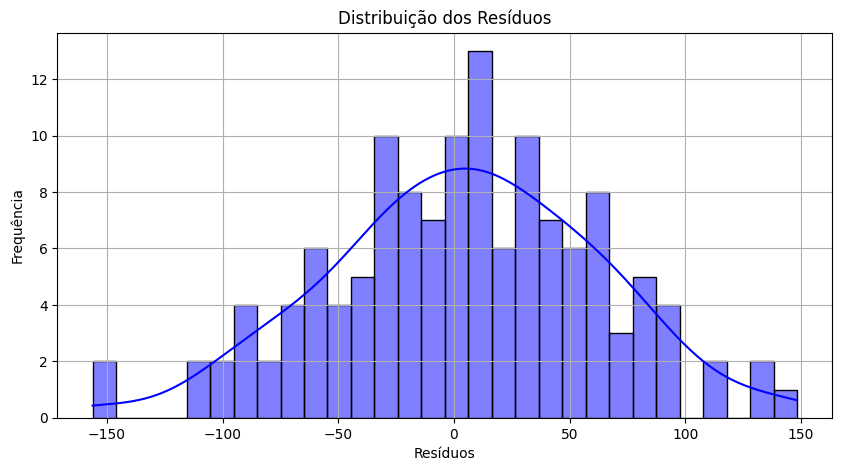

In [124]:
residuos = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, color='blue', bins=30)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

## Voting Regressor

In [93]:
from sklearn.ensemble import VotingRegressor

In [119]:
models = [("LR",lin_reg),("DT",d_tree),("SVR",bst_reg)]

In [120]:
model_weightings = np.array([0.1,0.3,0.6])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

In [121]:
v_reg.fit(x_train,y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('DT', DecisionTreeRegressor(max_depth=3)),
                            ('SVR',
                             AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3)))],
                weights=array([0.1, 0.3, 0.6]))

In [122]:
y_pred = v_reg.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  58.09754869149703


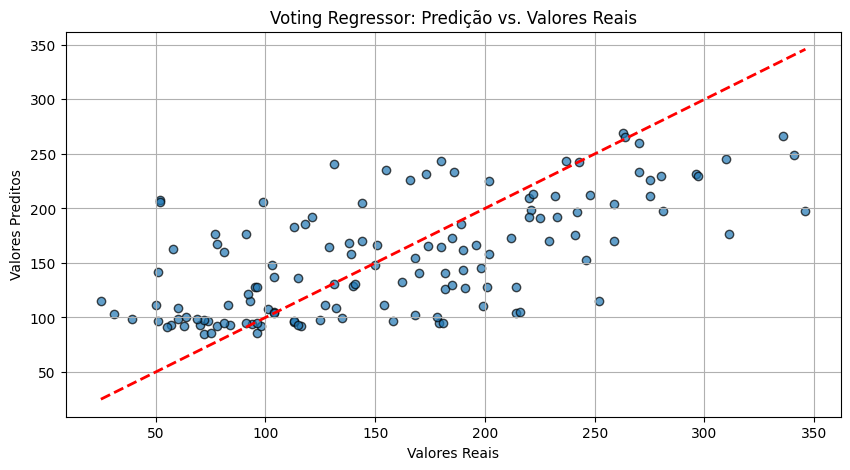

In [123]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Voting Regressor: Predição vs. Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.grid(True)
plt.show()

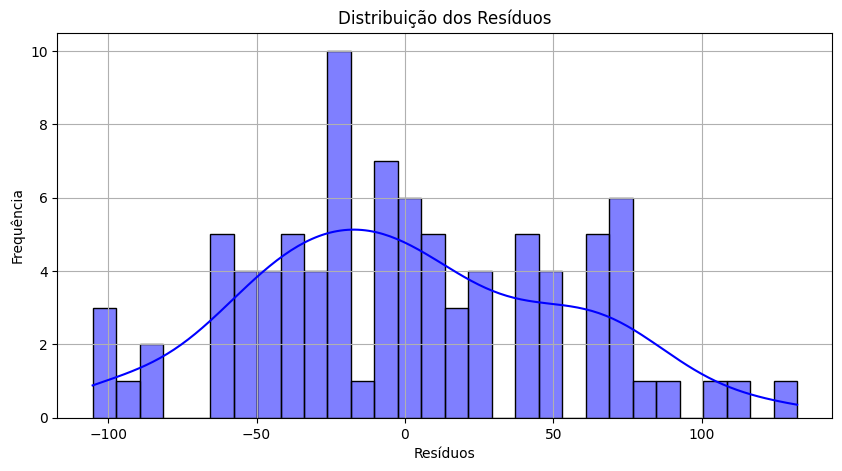

In [145]:
residuos = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, color='blue', bins=30)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

## Voting Teste 2

In [137]:
# Carregando o dataset Diabetes
diabetes = load_diabetes()
X = diabetes.data  # Features (características)
y = diabetes.target  # Labels (valores contínuos)

# Dividindo o dataset em conjunto de treinamento e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)

In [139]:
voting_model = VotingRegressor(estimators=[
    ('random_forest', rf_model),
    ('gradient_boosting', gb_model),
    ('knn', knn_model)
])

In [141]:
voting_model.fit(X_train, y_train )

VotingRegressor(estimators=[('random_forest',
                             RandomForestRegressor(random_state=42)),
                            ('gradient_boosting',
                             GradientBoostingRegressor(random_state=42)),
                            ('knn', KNeighborsRegressor())])

In [142]:
y_pred = voting_model.predict(X_test)

In [143]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

Erro Quadrático Médio (MSE): 2692.74
Coeficiente de Determinação (R²): 0.49


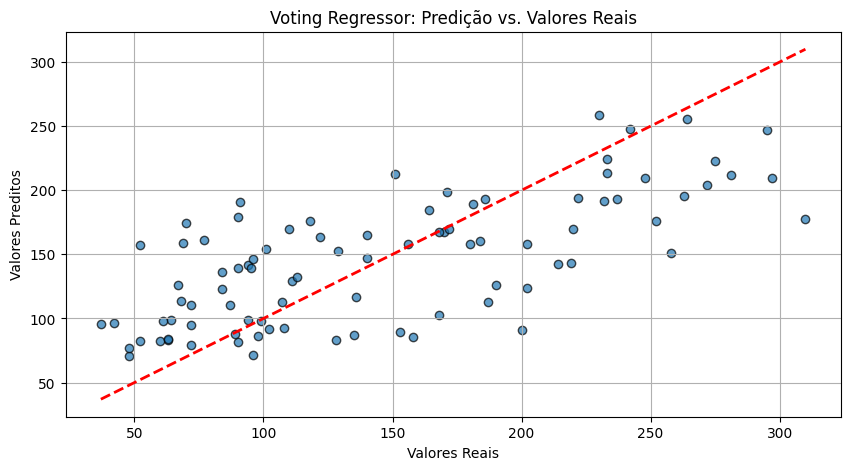

In [144]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Voting Regressor: Predição vs. Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.grid(True)
plt.show()

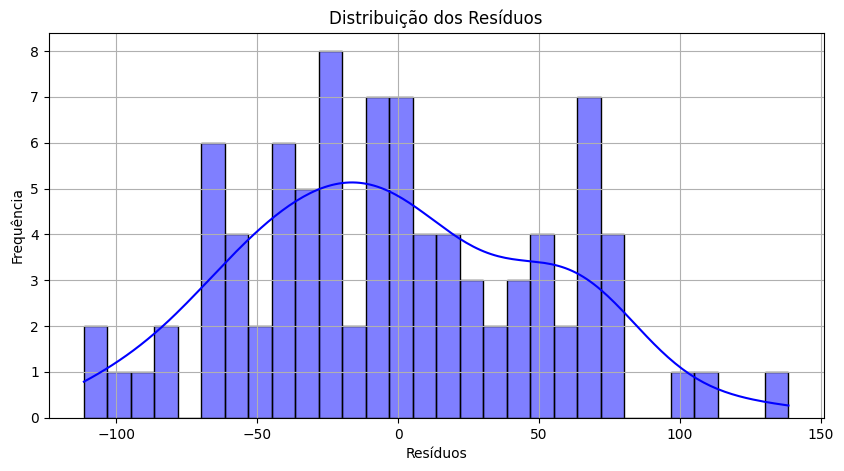

In [159]:
residuos = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, color='blue', bins=30)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [151]:
meta_model = LinearRegression()

In [152]:
base_learners = [
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('knn', KNeighborsRegressor(n_neighbors=5))
]

In [153]:
from sklearn.ensemble import StackingRegressor

# Criar o Stacking Regressor
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

In [154]:
# Treinar o modelo de Stacking
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('random_forest',
                               RandomForestRegressor(random_state=42)),
                              ('gradient_boosting',
                               GradientBoostingRegressor(random_state=42)),
                              ('knn', KNeighborsRegressor())],
                  final_estimator=LinearRegression())

In [155]:
# Fazer previsões no conjunto de teste
y_pred = stacking_model.predict(X_test)

In [156]:
# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [157]:
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

Erro Quadrático Médio (MSE): 2755.23
Coeficiente de Determinação (R²): 0.48


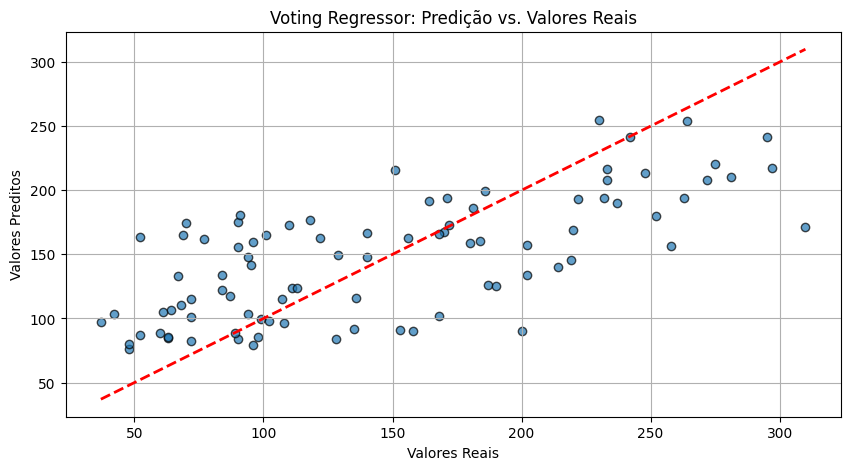

In [158]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Voting Regressor: Predição vs. Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.grid(True)
plt.show()

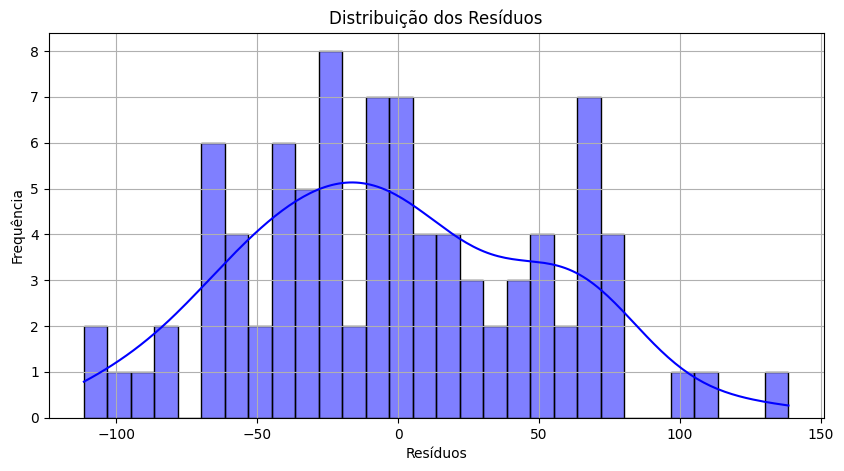

In [160]:
residuos = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, color='blue', bins=30)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Random Florest Classificator

In [171]:
from sklearn.datasets import load_breast_cancer

# Carregar o dataset Wine
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [174]:
y_pred = clf.predict(X_test)

In [175]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')


Acurácia: 96.49%


In [177]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

Relatório de Classificação:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [257]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [258]:
# Pré-processamento básico: preencher valores ausentes, codificar colunas categóricas
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<ipython-input-258-85f69c5fe92b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-258-85f69c5fe92b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [259]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [260]:
# Selecionar as features e o alvo
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [237]:
y_pred = clf.predict(X_test)


In [238]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')


Acurácia: 82.12%


In [239]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



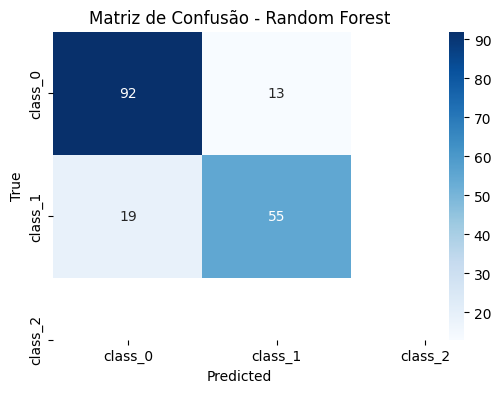

In [240]:
from sklearn.metrics import confusion_matrix

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Boosting - Classificação

In [241]:
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [203]:
perceptron = Perceptron(max_iter=1000, random_state=42)
#perceptron.fit(X_train, y_train)

# Fazer predições
#y_pred = perceptron.predict(X_test)

In [242]:
ada_boost = AdaBoostClassifier(estimator=perceptron, n_estimators=50, random_state=42)
ada_boost.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [243]:

y_pred = ada_boost.predict(X_test)

In [244]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia AdaBoost: {accuracy * 100:.2f}%')

Acurácia AdaBoost: 80.45%


In [245]:
print("Relatório de Classificação AdaBoost:")
print(classification_report(y_test, y_pred))

Relatório de Classificação AdaBoost:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



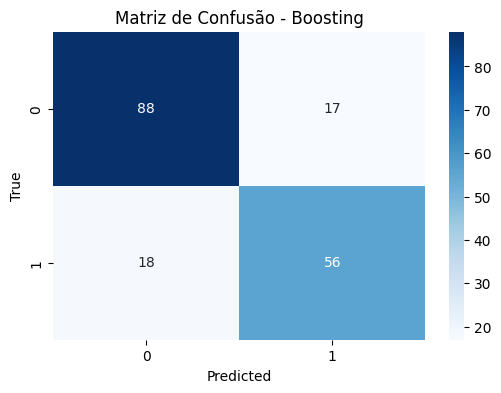

In [246]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [247]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boost.fit(X_train, y_train)

# Fazer predições
y_pred_gb = gradient_boost.predict(X_test)

# Avaliar o desempenho
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Acurácia Gradient Boosting: {accuracy_gb * 100:.2f}%')

# Relatório de classificação
print("Relatório de Classificação Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

Acurácia Gradient Boosting: 81.01%
Relatório de Classificação Gradient Boosting:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



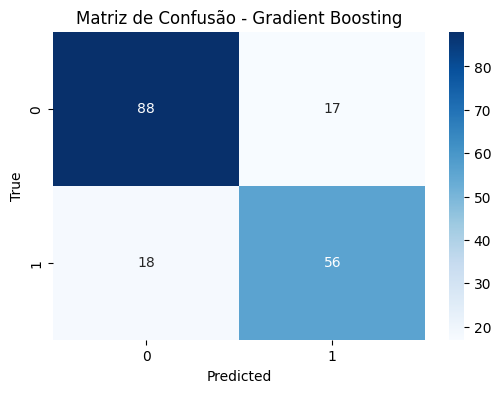

In [248]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Bagging - Classificação

In [267]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:

from sklearn.ensemble import BaggingClassifier

# Criar um classificador de árvore de decisão
base_classifier = DecisionTreeClassifier()

# Criar o modelo Bagging
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=50, random_state=42)

# Treinar o modelo Bagging
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [269]:
y_pred = bagging_classifier.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo Bagging: {accuracy:.2f}')

Acurácia do modelo Bagging: 0.96


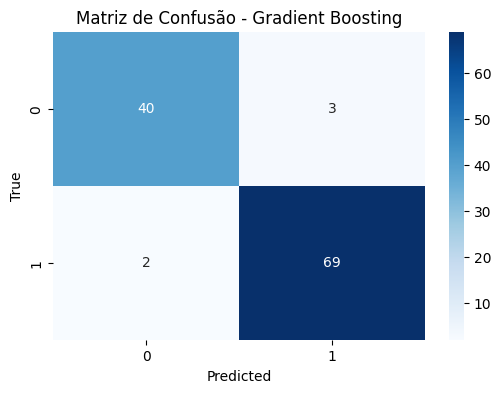

In [270]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Voting - Classificator

In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression(max_iter=200)
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier(n_estimators=50)

# Criar o Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt', clf2),
    ('rf', clf3)],
    voting='hard'  # Pode ser 'hard' ou 'soft'
)


In [263]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=200)),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier(n_estimators=50))])

In [264]:
y_pred = voting_classifier.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Voting Classifier: {accuracy:.2f}')

Acurácia do Voting Classifier: 0.82


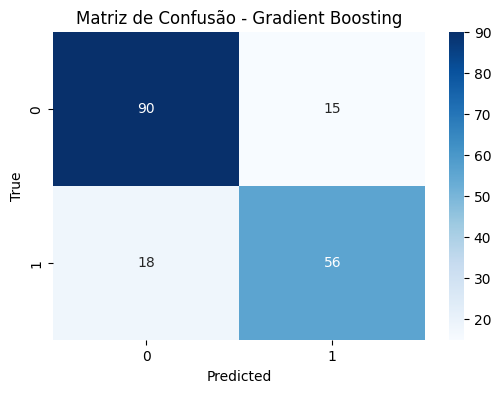

In [266]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()